In [20]:
from torchvision.transforms import Compose, ToTensor, Normalize

from utils import DatasetStatistics
from model import UNet
from dataset import SentinelNO2Dataset
from transforms import TargetNormalize

In [21]:
datastats = DatasetStatistics("../data/samples/samples_S2S5P_2018_2020_epa.csv", "../data/sentinel-2")

KeyError: 169

In [8]:
transform = Compose([ToTensor(), Normalize(datastats.band_means, datastats.band_std)])
target_transform = TargetNormalize(datastats.no2_mean, datastats.no2_std)

In [9]:
dataset = SentinelNO2Dataset(
    "../data/samples/samples_S2S5P_2018_2020_epa.csv",
    "../data/sentinel-2",
    transform=transform,
    target_transform=target_transform
)

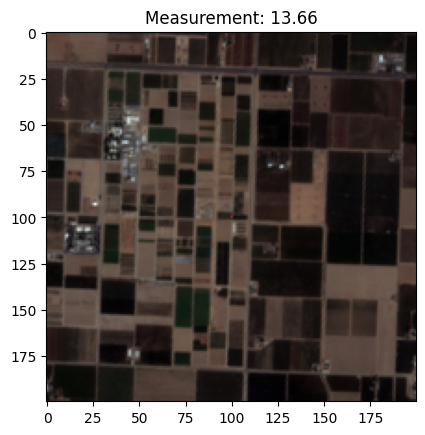

In [10]:
dataset.plot(0)

In [11]:
net = UNet()

In [12]:
dataset[0]

(tensor([[[ 8.4271e-01,  8.2843e-01,  8.0463e-01,  ..., -9.3392e-01,
           -9.4344e-01, -9.2083e-01],
          [ 7.9749e-01,  7.8321e-01,  7.4989e-01,  ..., -5.2100e-01,
           -4.4008e-01, -5.4242e-01],
          [ 7.6655e-01,  7.4513e-01,  7.2609e-01,  ..., -1.0922e+00,
           -1.0267e+00, -9.1726e-01],
          ...,
          [-1.3123e+00, -8.8989e-01, -2.5921e-01,  ...,  7.1181e-01,
            5.2617e-01,  2.6676e-01],
          [-1.2790e+00, -1.0053e+00, -1.1879e-01,  ...,  2.2630e-01,
            2.4296e-01,  3.8576e-01],
          [-1.3064e+00, -1.1648e+00, -2.7825e-01,  ..., -7.1853e-01,
           -8.3277e-01, -7.1377e-01]],
 
         [[ 3.0195e-01,  2.9667e-01,  2.9931e-01,  ..., -8.2230e-01,
           -7.8663e-01, -8.2230e-01],
          [ 2.7289e-01,  2.9667e-01,  2.7289e-01,  ..., -5.3298e-01,
           -5.8847e-01, -4.3786e-01],
          [ 2.7289e-01,  3.0724e-01,  2.4382e-01,  ..., -8.6722e-01,
           -8.8572e-01, -8.8968e-01],
          ...,
    

In [13]:
outputs = net(dataset[0][0])

In [14]:
outputs.shape

torch.Size([1, 108, 108])

In [15]:
import numpy as np
output_np = np.moveaxis(outputs.detach().numpy(), 0, -1)

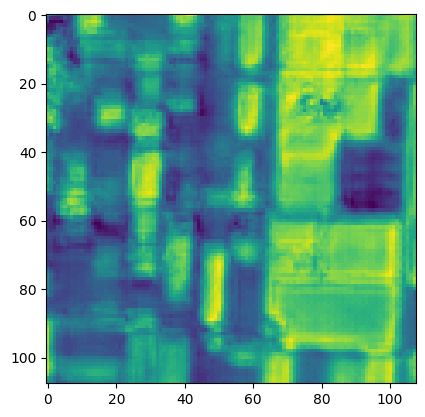

In [16]:
import matplotlib.pyplot as plt

plt.imshow(output_np)

In [18]:
import pandas as pd
samples_df = pd.read_csv("../data/samples/samples_S2S5P_2018_2020_epa.csv", index_col="idx")


In [19]:
samples_df

,AirQualityStation,no2,img_path,s5p_path
idx,,,,
0,06-019-4001,13.662373,06-019-4001/S2B_MSIL2A_20210918T183929_N0301_R...,06-019-4001/l3_mean_US_large_2018_2020_005dg.n...
1,06-113-0004,8.095412,06-113-0004/S2B_MSIL2A_20210921T184959_N0301_R...,06-113-0004/l3_mean_US_large_2018_2020_005dg.n...
2,53-033-0080,18.637006,53-033-0080/S2A_MSIL2A_20200828T190921_N0214_R...,53-033-0080/l3_mean_US_large_2018_2020_005dg.n...
3,06-085-0005,20.309101,06-085-0005/S2B_MSIL2A_20210921T184959_N0301_R...,06-085-0005/l3_mean_US_large_2018_2020_005dg.n...
4,06-067-0006,10.568265,06-067-0006/S2A_MSIL2A_20210916T185021_N0301_R...,06-067-0006/l3_mean_US_large_2018_2020_005dg.n...
...,...,...,...,...
86,06-013-1002,8.923444,06-013-1002/S2A_MSIL2A_20210916T185021_N0301_R...,06-013-1002/l3_mean_US_large_2018_2020_005dg.n...
87,06-013-1004,14.058452,06-013-1004/S2B_MSIL2A_20210921T184959_N0301_R...,06-013-1004/l3_mean_US_large_2018_2020_005dg.n...
88,06-037-6012,18.510417,06-037-6012/S2A_MSIL2A_20210920T183041_N0301_R...,06-037-6012/l3_mean_US_large_2018_2020_005dg.n...
